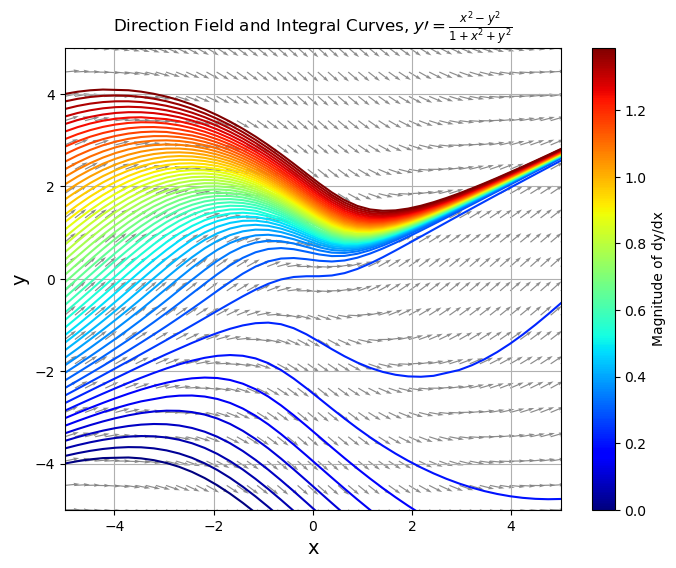

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
# Define the differential equation dy/dx = f(x, y)
def dydx(y, x):
    
    return (x**2 - y**2) /(1 + x**2+ y**2)  # Other Example: dy/dx = x - y

# Function to compute the direction field
def direction_field(x, y, f, ax, scale=0.5):
    X, Y = np.meshgrid(x, y)
    U = np.ones_like(X)  # x-component of the arrows (constant for uniform spacing)
    V = f(Y, X)         # y-component of the arrows (depends on function f)
    M = np.hypot(U, V)  # Compute magnitude of arrows
    M[~(M == 0)] = 1.0 / M[~(M == 0)]  # Avoid division by zero and normalize lengths
    U *= M  # Normalize x-components
    V *= M  # Normalize y-components
    ax.quiver(X, Y, U*scale, V*scale, angles='xy', scale_units='xy', scale=1, color='gray',alpha = 0.9)

def make_plot(dydx, direction_field,xs = [-5,5],ys = [-5,5]):
    # define the domain: 
    x0 ,  x1 =xs
    xn = 50
    
    y0 , y1 = ys
    yn = 20
    # Define the range for the plot
    x = np.linspace(x0, x1, xn)
    y = np.linspace(y0, y1, yn)
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the direction field with shorter arrows
    direction_field(x, y, dydx, ax, scale=0.3)  # Adjust scale to make arrows shorter
    
    n_curves = 50
    i = 0 
    # Plot the integral curves
    colors = cm.jet(np.linspace(0, 1, n_curves))
    
    x_vals = np.linspace(x0, x1, 40)  # Finer resolution for better curves
    for y_init in np.linspace(-4, 4, n_curves):  # Different initial y-values
     # Avoid solving near singularities where 1 - x^2 - y^2 = 0
        valid_idx = np.abs((x_vals**2 - y_init**2) /(1 + x_vals**2+ y_init
                                                     **2)) > 1e-2
        if np.any(valid_idx):
            sol = odeint(lambda y, x: dydx(y, x), y_init, x_vals[valid_idx])
            ax.plot(x_vals[valid_idx], sol, label=f'Initial y={y_init}', color=colors[i] )
            i +=1
    
    # Add a colorbar for the gradient
    sm = ScalarMappable(norm=Normalize(vmin=0, vmax=np.max(np.hypot(np.ones_like(x), dydx(np.zeros_like(x), x)))), cmap='jet')
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Magnitude of dy/dx')
    
    
    # Set plot limits and labels
    ax.set_xlim([x0, x1])
    ax.set_ylim([y0,y1])
    ax.set_xlabel('x',fontsize = 14)
    ax.set_ylabel('y',fontsize = 14)
    ax.set_title(r'Direction Field and Integral Curves, $y\prime = \frac{x^2 - y^2}{1 + x^2 + y^2}$')
    # ax.legend()
    
    plt.grid()
    plt.show()
    fig.savefig('dirfield_intcurve.jpeg', bbox_inches = 'tight', dpi = 100)
def dydx_2(y, x):
    return (x - 2)/((y**2 + 1)*np.sin(x-2)) + np.sin(y) # Example: dy/dx = x - y

make_plot(dydx, direction_field)